In [2]:
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

## Converting Video to numpy array


In [4]:
DATA_DIR = './Data/'
CATEGORIES = ['Shoplifting', 'Normal']

IMG_SIZE = 224

pathOut = "./"
count = 0
counter = 1

frames = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    
    for vid in tqdm(os.listdir(path)):
        try:
            vid = os.path.join(path, vid)
            cap = cv2.VideoCapture(vid)
            count = 0
            counter += 1
            success = True
            while success:
                success,image = cap.read()
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        #         print('read a new frame:',success)
                if count%30 == 0 :
                    frames.append([image, class_num])
        #              cv2.imwrite(pathOut + 'frame%d.jpg'%count,image)
                count+=1
        except Exception as e:
            pass
        
print(count, " frames extracted")
# frames = np.array(frames)
# print("data shape =\t", frames.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:50<00:00,  1.32s/it]

2360  frames extracted


In [5]:
# sample backup
dump = frames

# for i in frames:
#     print(i[1])

# converting to numpy array
frames = np.array(frames)

print(frames[0][0].shape)

(224, 224, 3)


In [140]:
# for i in frames:
#     print(i[1])

# np.random.shuffle(frames)
# test, training = frames[:80,:], frames[80:,:]


# train_x = []
# train_y = []
# test_x = []
# test_y = []

# for x,y in training:
#     train_x.append(x)
#     train_y.append(y)
    
# for x,y in test:
#     test_x.append(x)
#     test_y.append(y)
    
# train_x = np.array(train_x)
# train_y = np.array(train_y)
# test_x = np.array(test_x)
# test_y = np.array(test_y)


# test and train by 80:20


from sklearn.model_selection import train_test_split

x = []
y = []

# print(x)

for frame in frames:
    x.append(frame[0])
    y.append(frame[1])

train_x, test_x, train_y, test_y = train_test_split(frames, y, test_size=0.2, random_state=1)

### Store the numpy array in a file

In [ ]:
np.save("frames_data.npy", frames)
print("downsampled frames stored to frames_data.npy")

### Plot the array using Matplotlib

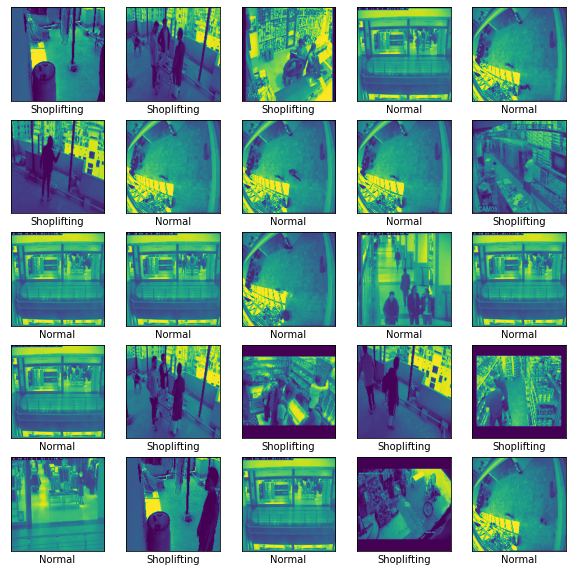

In [141]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_x[i][0])
    plt.xlabel(CATEGORIES[train_x[i][1]])
plt.show()

In [ ]:
TRAINING_DIR = "./mask_detection/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./mask_detection/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

In [146]:
# reshape to be [samples][width][height][channels]
# train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
# convert from int to float

# x = train_x[len(train_x)-1]
# y = train_y[len(train_y)-1]

# x = x.astype('float32')
# y = y.astype('float32')


# train_datagen = ImageDataGenerator(rescale=1.0/255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')

# train_datagen.fit(train_x)


# print(train_x[train_x.size-1])

# train_datagen = ImageDataGenerator.flow(
#     x=train_x,
#     y=train_y,
#     batch_size=32,
#     shuffle=True,
#     sample_weight=None,
#     seed=None,
#     save_to_dir=None,
#     subset=train_x,
# )



datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


# x = np.array(train_x)
# print(train_x.size)
# x = np.array(list(map(np.float, x)))

# from numpy import  newaxis
# train_x1 = train_x[:, :, newaxis, newaxis]
# print(train_x1.shape)
# train_x1 = train_x1.reshape(247, 9, 2, 1)


datagen.flow(train_x, train_y, batch_size=32)



# fits the model on batches with real-time data augmentation:

# model.fit(datagen.flow(train_x, train_y, batch_size=32),
#           steps_per_epoch=len(train_x) / 32, epochs=epochs)


# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D

# model = Sequential()
# model.add(Dense(1024, activation='relu', input_shape=(25088,)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(101, activation='softmax'))


# from keras.callbacks import ModelCheckpoint
# mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')


# train_x = np.array(train_x)
# train_x = np.asarray(train_x).astype('float32')
# train_y = np.array(train_y)
# train_y = np.asarray(train_y).astype('float32')


# # compiling the model
# model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# model.fit(datagen.flow(train_x, train_y, batch_size=32),
#           steps_per_epoch=len(train_x) / 32, epochs=10)

# model.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_y), callbacks=[mcp_save], batch_size=128)


ValueError: setting an array element with a sequence.

In [ ]:
from PIL import Image



count = 0
for i in range(len(frames)):
#     print(type(frames[i][1]))
#     print(frames[i][1])
    if frames[i][1] == 0:
        count += 1
        Image.fromarray(frames[i][0]).save(r"E:\Project\Python\Jupyter\Thesis\Data\Converted\Shoplifting\img{}.jpg".format(count), 'JPEG')
    else:
        count += 1
        Image.fromarray(frames[i][0]).save(r"E:\Project\Python\Jupyter\Thesis\Data\Converted\Normal_Activity\img{}.jpg".format(count), 'JPEG')

In [ ]:
# some global params
SIZE = (112, 112)
CHANNELS = 3
NBFRAME = 5
BS = 8
# pattern to get videos and classes
glob_pattern='videos/{classname}/*.avi'
# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.33, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)